<center><b><font size=10>Unraveling Employee Attrition</font></b></center>
<center><b><font color='red' size=5>A Deep Dive into HR Data</font></b></center>

---
### An Introduction To The Notebook. "Background"
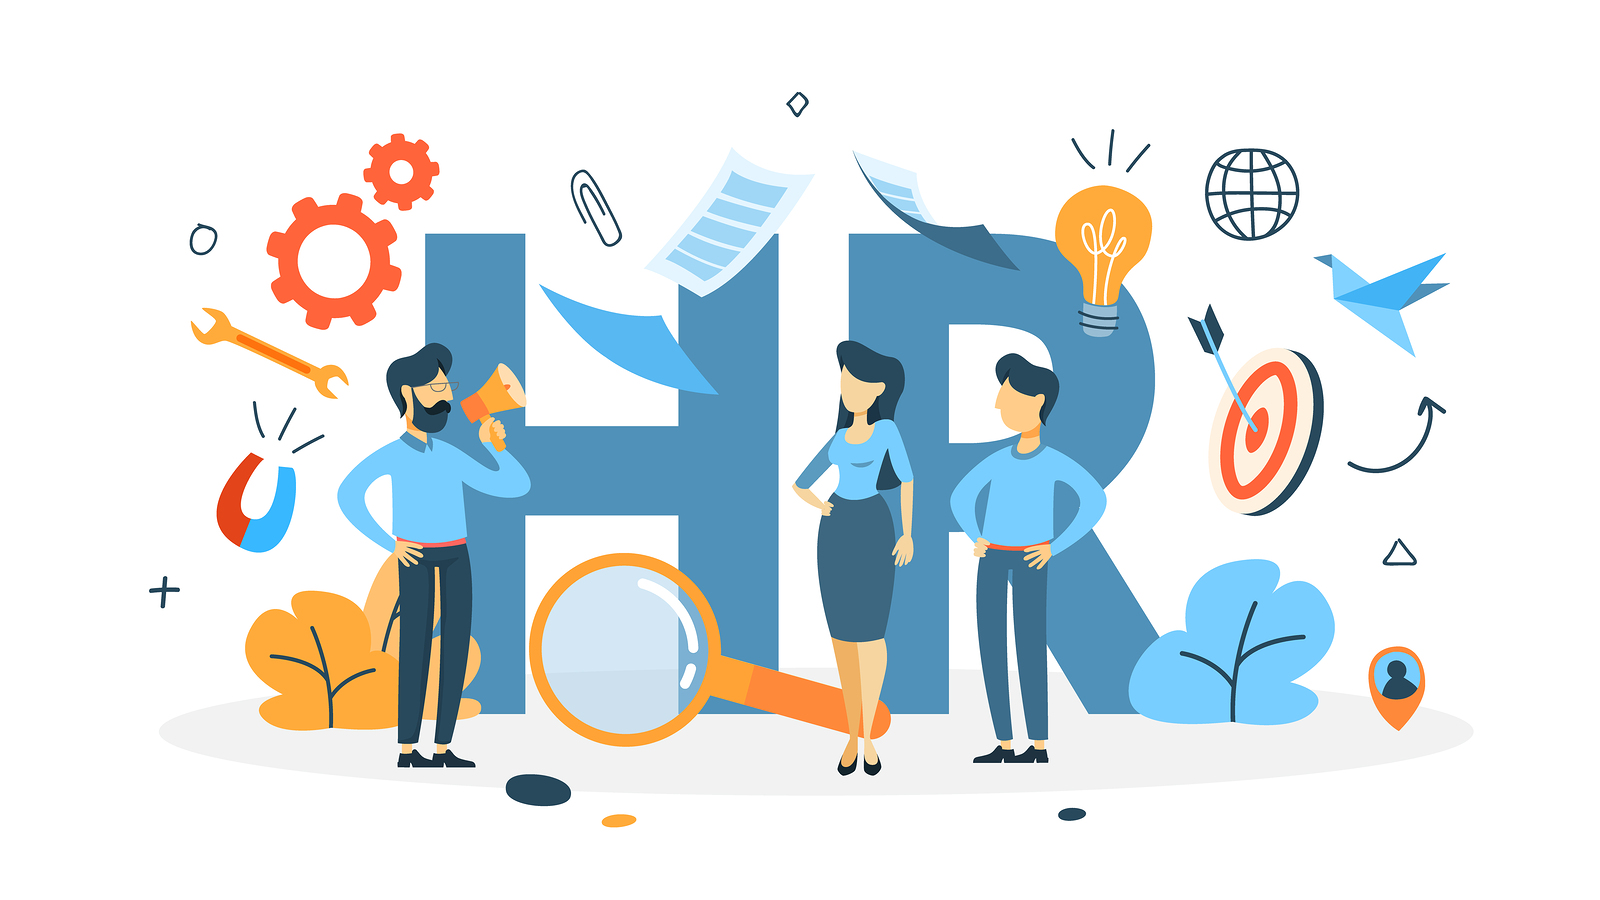 
###### `Source`: The HR Gazette.
* #### The IBM HR Analytics Attrition Dataset offers a comprehensive view of employee attrition within an organization. This dataset provides valuable insights into the factors contributing to employee turnover and allows for a deeper understanding of workforce dynamics.

* #### Key columns in the dataset include:
    - ##### Age: The age of the employees.
    - ##### Attrition: Indicates whether an employee has left the organization (Yes) or is still employed (No).
    - ##### BusinessTravel: The frequency of business travel undertaken by employees.
    - ##### DailyRate: The daily rate of pay for employees.
    - ##### Department: The department in which employees work.
    - ##### DistanceFromHome: The distance between employees' homes and their workplace.
    - ##### Education: The level of education achieved by employees.
    - ##### EducationField: The field of education for employees.
    - ##### EmployeeCount: The count of employees.
    - ##### EmployeeNumber: The unique identifier for each employee.
    - ##### EnvironmentSatisfaction: The satisfaction level of employees with their work environment.
    - ##### Gender: The gender of employees.
    - ##### HourlyRate: The hourly rate of pay for employees.
    - ##### JobInvolvement: The level of job involvement or engagement of employees.
    - ##### JobLevel: The level or rank of employees' jobs within the organization.
    - ##### JobRole: The specific role or position of employees.
    - ##### JobSatisfaction: The satisfaction level of employees with their jobs.
    - ##### MaritalStatus: The marital status of employees.
    - ##### MonthlyIncome: The monthly income of employees.
    - ##### MonthlyRate: The monthly rate of pay for employees.
    - ##### NumCompaniesWorked: The number of companies that employees have worked for in the past.
    - ##### Over18: Indicates whether employees are over 18 years old.
    - ##### OverTime: Indicates whether employees work overtime or not.
    - ##### PercentSalaryHike: The percentage increase in salary for employees.
    - ##### PerformanceRating: The performance rating of employees.
    - ##### RelationshipSatisfaction: The satisfaction level of employees with their work relationships.
    - ##### StandardHours: The standard number of hours worked by employees.
    - ##### StockOptionLevel: The level of stock options granted to employees.
    - ##### TotalWorkingYears: The total number of years employees have worked.
    - ##### TrainingTimesLastYear: The number of times employees were trained last year.
    - ##### WorkLifeBalance: The balance between work and personal life as perceived by employees.
    - ##### YearsAtCompany: The number of years employees have spent at the company.
    - ##### YearsInCurrentRole: The number of years employees have been in their current role.
    - ##### YearsSinceLastPromotion: The number of years since employees' last promotion.
    - ##### YearsWithCurrManager: The number of years employees have worked with their current manager.
* #### By exploring and analyzing this dataset, we aim to uncover trends, patterns, and potential indicators of attrition within the organization.
---
- ## What Is The Expected Content Of This Notebook?
    * #### We will mainly perform an `Exploratory Data Analysis`, and comment on the results in the `conclusions`.
    * #### We will also provide a `Employee Attrition Prediction`.
    * #### Determine which features have the most influence on employee attrition.
    * #### And much more >....<.
---
- ## Table Of Contents:
    1. #### Importing Necessary Packages. [Go to T.1](#T.1)
    2. #### Exploratory Data Analysis. [Go to T.2](#T.2)
    3. #### Preprocessing The Data. [Go to T.3](#T.3)
    4. #### Employee Attrition Prediction. [Go to T.4](#T.4)
    5. #### Compensation Analysis. [Go to T.5](#T.5)
    6. #### Conclusions. [Go to T.6](#T.6)

---
<a id="T.1"></a>
### Importing Necessary Packages:
- #### We May Need Some Of The Following Packages, And Modules: 
    * ##### Numpy.
    * ##### Pandas.
    * ##### Seaborn, MatplotLib.
    * ##### Sk-Learn "Science Kit Learn".
    * ##### > .... <

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import ttest_ind

---
<a id="T.2"></a>
### Exploratory Data Analysis:
- #### In This Part, We Will:
    * ##### Read The Data.
    * ##### Have A General Look At It "Show Some Samples From It".
    * ##### Take A Look At The Information Of The Data.
    * ##### Do Some Graphs, To Understand The Data More and More.
    * ##### >.....<

In [2]:
employee_data = pd.read_csv('Data\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Some General Information About Our Data, Their Purpose Are Explained In Each Print.
print("Data Size:",employee_data.shape)
print("-"* 30)
print("About Dataset:")
employee_data.info()
print("-"* 30)
print("Data Columns:",list(employee_data.columns))
print("-"* 30)
print("Number of Examples 'N'=",employee_data.shape[0])
print("Number of Dimensions 'D'=",employee_data.shape[1]-1)
print("-"* 30)
print("Data Check For Any Duplicates:",employee_data.duplicated().any())

Data Size: (1470, 35)
------------------------------
About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolve

In [4]:
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
na_counts = employee_data.apply(lambda x: x.value_counts().get('Not Available', 0))
print('Not Available Values:')
print(na_counts)

Not Available Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

---
* #### From the results up, we can conclude the following:
    - ##### The Data consists of `1470` row, and `35` columns.
    - ##### The Data Types of each column seems to be assigned correctly `We don't need to correct the data types of columns`.
    - ##### The Data doesn't have any `missing - null` values, but if we looked for `Not Available` values, we will also don't find any instances that got this value, which means they are no missing values.
    - ##### Some columns are not necessary for our `Prediction`, since a lot of them is personal details, and we would like to get the core data, which will help us more to identify the employee's attrition.

---
<a id="TPS"></a>
### Tiny Preprocessing Steps
* #### We will perform:
    - ##### Encode categorical columns into numerical variables.
    - ##### Have a look again at our data after the changes we made.
    - ##### Determine if we need `scaling` for our data.

In [6]:
employee_data[employee_data.columns[11:25]].head()

,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3
1,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4
2,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3
3,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3
4,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3


In [7]:
columns_to_encode = ['Attrition', 'JobRole', 'BusinessTravel', 'Department', 'EducationField',
                     'Gender', 'MaritalStatus', 'Over18', 'OverTime']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    values = np.unique(employee_data[col])
    employee_data[col] = label_encoder.fit_transform(employee_data[col])
    encoded_values = label_encoder.transform(values)
    class_to_value = {label: value for label, value in zip(label_encoder.classes_, encoded_values)}
    print("The",col, "column will be mapped as:", class_to_value)
employee_data[employee_data.columns[11:25]].head()

The Attrition column will be mapped as: {'No': 0, 'Yes': 1}
The JobRole column will be mapped as: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
The BusinessTravel column will be mapped as: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
The Department column will be mapped as: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
The EducationField column will be mapped as: {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
The Gender column will be mapped as: {'Female': 0, 'Male': 1}
The MaritalStatus column will be mapped as: {'Divorced': 0, 'Married': 1, 'Single': 2}
The Over18 column will be mapped as: {'Y': 0}
The OverTime column will be mapped as: {'No': 0, 'Yes': 1}


,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3
1,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4
2,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3
3,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3
4,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3


In [8]:
numerical_data = employee_data.select_dtypes(include='number')
for column in numerical_data:
    print("'" + column + "'", "Range Of Values:",numerical_data[column].min(),"-",numerical_data[column].max())
    print("-"* 30)
print("Values Shown Previously Prove That We Need To Re-Scale Some of Our Features' Values.")

'Age' Range Of Values: 18 - 60
------------------------------
'Attrition' Range Of Values: 0 - 1
------------------------------
'BusinessTravel' Range Of Values: 0 - 2
------------------------------
'DailyRate' Range Of Values: 102 - 1499
------------------------------
'Department' Range Of Values: 0 - 2
------------------------------
'DistanceFromHome' Range Of Values: 1 - 29
------------------------------
'Education' Range Of Values: 1 - 5
------------------------------
'EducationField' Range Of Values: 0 - 5
------------------------------
'EmployeeCount' Range Of Values: 1 - 1
------------------------------
'EmployeeNumber' Range Of Values: 1 - 2068
------------------------------
'EnvironmentSatisfaction' Range Of Values: 1 - 4
------------------------------
'Gender' Range Of Values: 0 - 1
------------------------------
'HourlyRate' Range Of Values: 30 - 100
------------------------------
'JobInvolvement' Range Of Values: 1 - 4
------------------------------
'JobLevel' Range Of Valu

---
* #### As a result from the code above, we can conclude that:
    - ##### We can get alot of insights from the describe table.
    - ##### We can determine that for some columns, we need to do scaling `Either with minMax scaling, or standardization`, since the values for those column got a big gap between the minimum value and the maximum value.
    - ##### The encoded classes and values for each column are:
        + ###### `Attrition` column: {'No': 0, 'Yes': 1}
        + ###### `JobRole` column: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
        + ###### `BusinessTravel` column: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
        + ###### `Department` column: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
        + ###### `EducationField` column: {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
        + ###### `Gender` column: {'Female': 0, 'Male': 1}
        + ###### `MaritalStatus` column: {'Divorced': 0, 'Married': 1, 'Single': 2}
        + ###### `Over18` column: {'Y': 0 }
        + ###### `OverTime` column: {'No': 0, 'Yes': 1}

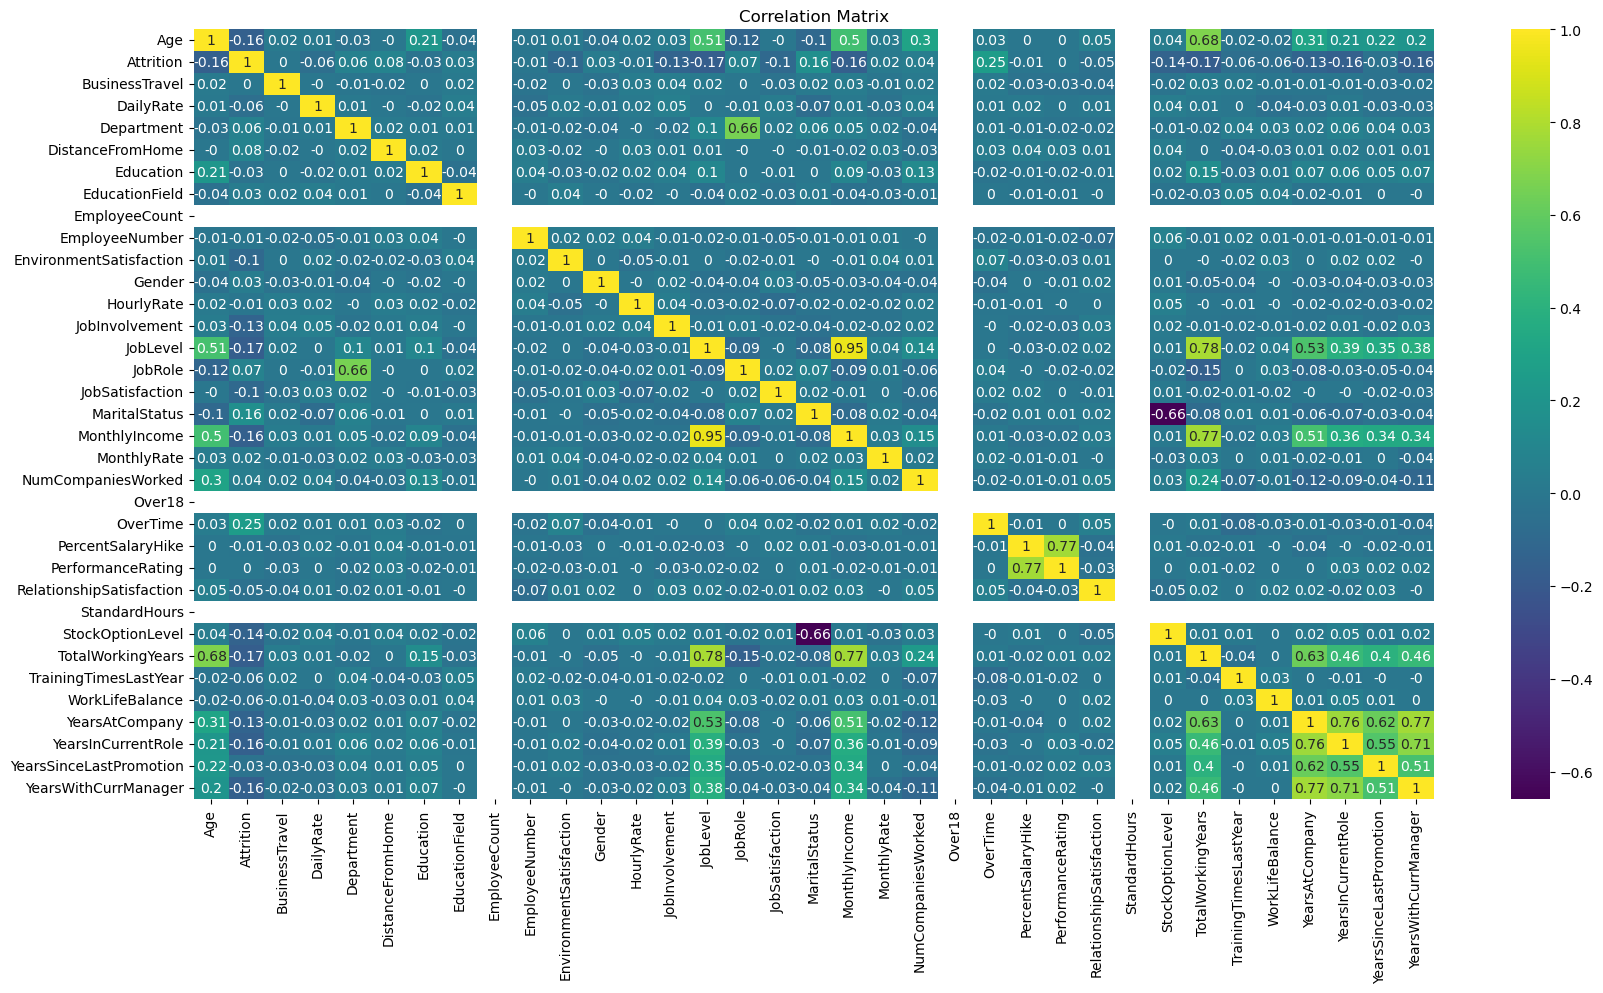

In [9]:
corr = round(employee_data.corr(), 2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

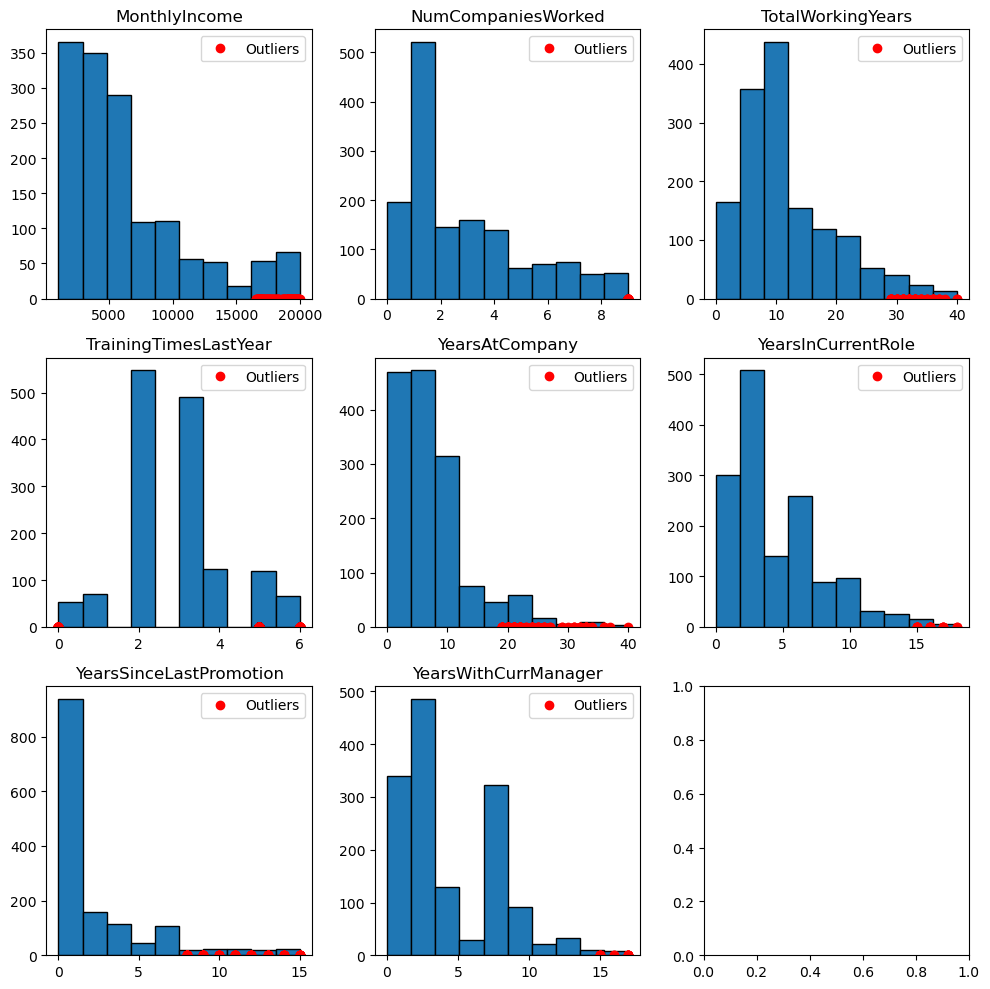

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axs = axs.ravel()
subplot_index = 0

for i, col in enumerate(employee_data.columns):
    Q1 = employee_data[col].quantile(0.25)
    Q3 = employee_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = employee_data[col][(employee_data[col] < lower_bound) | (employee_data[col] > upper_bound)]
    if len(outliers) != 0 and len(np.unique(employee_data[col])) > 4:
        axs[subplot_index].hist(employee_data[col], bins=10, edgecolor='k')
        axs[subplot_index].plot(outliers, [0] * len(outliers), 'ro', label='Outliers')
        axs[subplot_index].set_title(col)
        axs[subplot_index].legend()
        subplot_index += 1

plt.tight_layout()
plt.show()

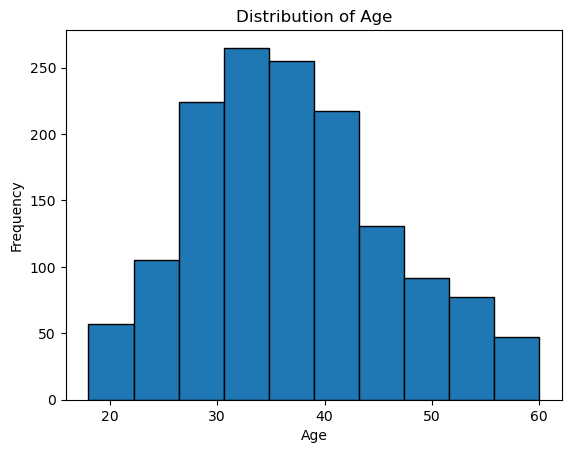

In [11]:
# Histogram for Age
plt.hist(employee_data['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

C:\Users\Ameer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


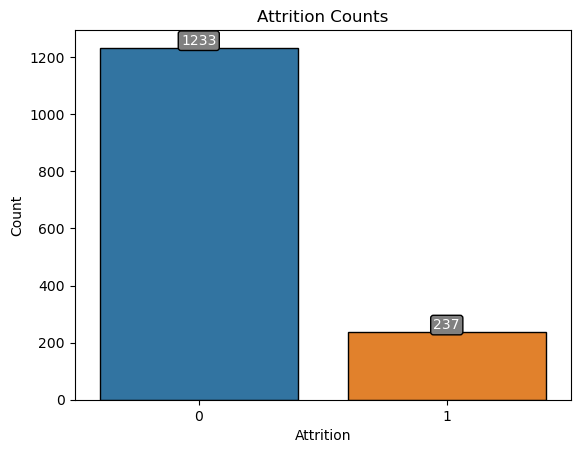

In [12]:
sns.countplot(employee_data['Attrition'], edgecolor='black')
for i, count in enumerate(employee_data['Attrition'].value_counts().values):
    plt.text(i, count, str(count), ha='center', va='bottom',
             color='white', fontsize=10,
             bbox=dict(facecolor='gray', edgecolor='black', boxstyle='round,pad=0.2'))
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Counts')
plt.show()

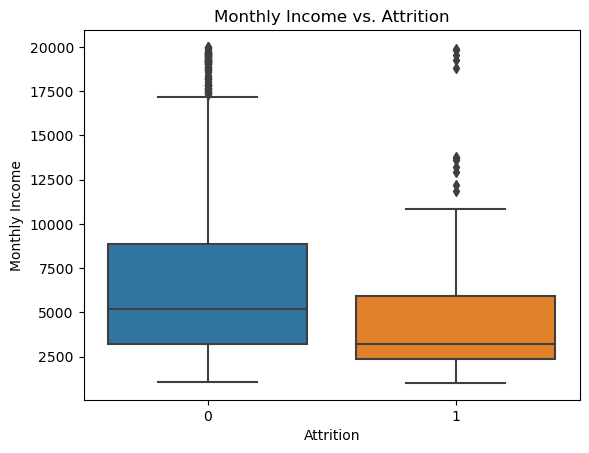

In [13]:
sns.boxplot(x=employee_data['Attrition'], y=employee_data['MonthlyIncome'])
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs. Attrition')
plt.show()

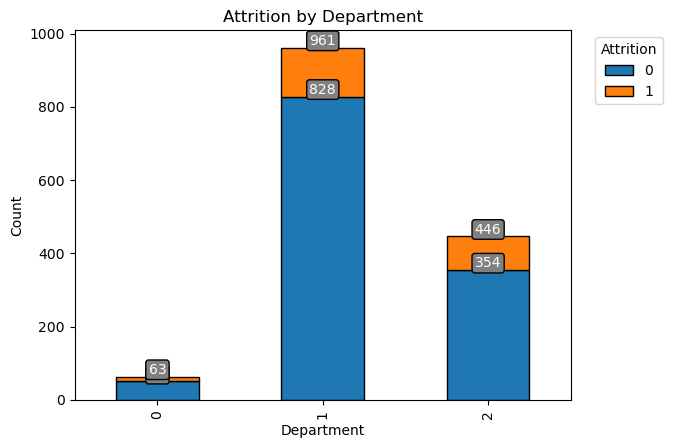

Attrition,0,1,All
Department,,,
0,51,12,63
1,828,133,961
2,354,92,446
All,1233,237,1470


In [14]:
attrition_by_dept = pd.crosstab(employee_data['Department'], employee_data['Attrition'])

ax = attrition_by_dept.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', bbox_to_anchor=(1.2, 1))

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='white', fontsize=10, bbox=dict(facecolor='gray', edgecolor='black', boxstyle='round,pad=0.2'))
plt.title('Attrition by Department')
plt.show()

attrition_by_dept = pd.crosstab(employee_data['Department'], employee_data['Attrition'], margins= True)
attrition_by_dept

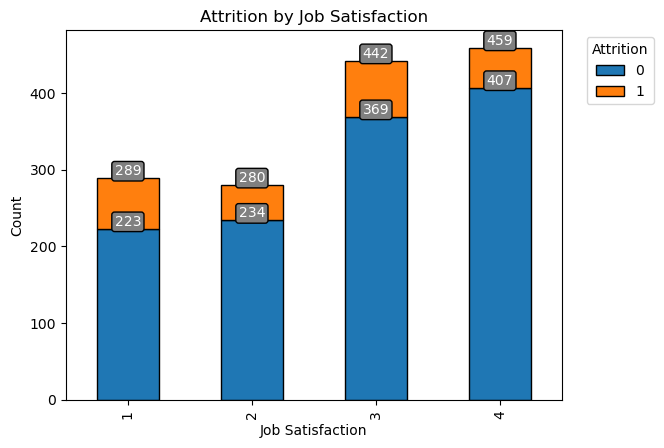

Attrition,0,1,All
JobSatisfaction,,,
1,223,66,289
2,234,46,280
3,369,73,442
4,407,52,459
All,1233,237,1470


In [15]:
attrition_by_job_satisfaction = pd.crosstab(employee_data['JobSatisfaction'], employee_data['Attrition'])

ax = attrition_by_job_satisfaction.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', bbox_to_anchor=(1.2, 1))

for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='white', fontsize=10, bbox=dict(facecolor='gray', edgecolor='black', boxstyle='round,pad=0.2'))
plt.show()

attrition_by_job_satisfaction = pd.crosstab(employee_data['JobSatisfaction'], employee_data['Attrition'], margins= True)
attrition_by_job_satisfaction

---
* #### As we can see from the graphs above, which are: 
    1. ##### HeatMap for the correlation matrix.
    2. ##### Distribution plot of the outliers calculated by `IQR` method.
    3. ##### Distribution plot of `Age` column.
    4. ##### Count plot of `Attrition` column.
    5. ##### Box plot of `MonthlyIncome` vs. `Attrition` columns.
    6. ##### Stacked bar plot of `Attrition` column by `Department` column.
    7. ##### Stacked bar plot of `Attrition` column by `JobSatisfaction` column.
* And we can conclude from those graphs:
    - ##### There is strong correlation between some columns data..
    - ##### We used `IQR` method to identify number of possible outliers in our data, by setting a threshold of `Upper bound`, and `Lower bound` to identify the outliers.
    - ##### Then plot the outliers evaluated by `IQR` with `Histogram` plot, with the outliers values annotated on them.
    - ##### We can see that for the `Histogram` plots of the outliers, we can take into consideration the outliers values, at the same time, they don't give big sense for the context of the outliers, except that we may think about `YearsAtCompany` column might have outliers for the values above `35`.
    - ##### We can see an `Age Distribution` plot, most of ages ranges from almost 30-40 `years`, and the distribution might be right-skewed, so that:
        + ##### It indicates that the majority of the data points in the column are concentrated on the left side of the distribution:
            * ###### We now know that we can focus on creating relevant features that capture important patterns and variations within that range. By engineering features that emphasize this portion of the distribution, we can potentially improve the predictive power of our model.
            * ###### Knowing that our distribution is right-skewed, guide us in selecting suitable modeling techniques. For example, algorithms that are robust to outliers and can handle skewed distributions, such as decision trees or random forests, may be preferred over models that assume a normal distribution, like linear regression
        + ##### The median will be smaller than the mean due to the influence of the skewed tail. It indicates that the typical value or the center of the distribution is closer to the left side.
    - ##### Most of the employees have not got attrition based on `Attrition Count` plot.
    - ##### Based on `Monthly Income vs. Attrition Box Plot`, we can see that the employees with higher `Monthly Income` doesn't have `Attrition`, and others who got lower `Montly Income` have `Attrition`.
    - ##### Based on `Attrition by Department Stacked Bar Plot`, we can see that most of the population is from the `Research & Development` department, with more than 70% of them don't have `Attrition`.
    - ##### Based on `Attrition by Job Satisfaction Stacked Bar Plot`, we can see that most of the population have got `3-4` Job Satisfaction level, and almost more than 80% of the whole population with different `Job Satisfaction` levels don't have `Attrition`

---
<a id="T.3"></a>
### Preprocessing The Data:
- #### In This Part, and Beside The Tiny Preprocessing Steps We Already Did [Here](#TPS), We Will:
    * ##### Drop unnecessary columns, like `EmployeeNumber`.
    * ##### Scale our numerical data for the respected columns using `minMax` scaler.
    * ##### Perform `Feature Importances` [Here](#FI), so we can determine most important features can be fitted into a `RandomForest Classifier`.
* ##### `Ps:` We will use `minMax` scaler, as we would like to:
    - ###### Rescale the data to a fixed range, typically between 0 and 1.
    - ###### It would be useful when we want to ensure that all features have the same scale and are bound within a specific range.
    - ###### It can be sensitive to outliers since the range is determined by the minimum and maximum values. `But since the outliers in this context, for example the budget column, an extreme high value may not be considered as an outlier, and so on.`

In [16]:
employee_data.drop(['EmployeeNumber'], axis=1, inplace= True)
scaler = MinMaxScaler()
scaler.fit(employee_data[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']])
scaled_data = scaler.transform(employee_data[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']])
employee_data[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']] = scaled_data
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,0.715820,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,0.126700,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,0.909807,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,0.923407,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,0.350036,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


---
<a id="FI"></a>
### Feature Importance:
- #### In This Part, We Will Determine The Importance of Features in Our Data by:
    * ##### Pickup features, and a target column `X, Y` to implement our approach on. `Which Attrition column will be as the target`
    * ##### Split the data into training, and testing sets with test size of `25%` of the total data.
    * ##### Initialize `RandomForestClassifier` model, to fit the data on it.
    * ##### Get `Feature Importances`.
    * ##### Sort feature importances in descending order.
    * ##### Rearrange feature names based on the sorted feature importances.
    * ##### Finally, plot feature importances using `bar` plot, where the `x-axis` represents the features, and `y-axis` the importance values of the features.

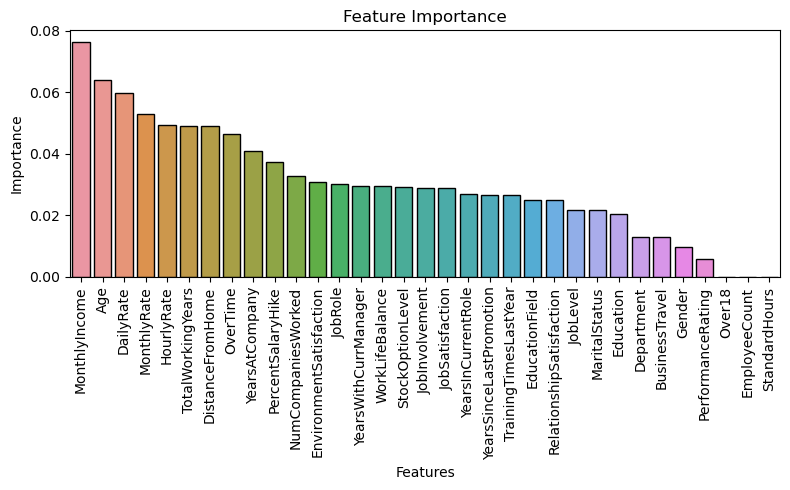

In [17]:
X = employee_data.drop(['Attrition'], axis=1)
Y = employee_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

model = RandomForestClassifier(n_estimators=1000, random_state=123)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [X.columns[i] for i in indices]

plt.figure(figsize=(8,5))
sns.barplot(x = list(range(len(X.columns))), y= importances[indices], edgecolor='black')
plt.xticks(range(len(X.columns)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

---
<a id="T.4"></a>
### Employee Attrition Prediction:
- #### In This Part, and After We Have Executed `Feature Imporatnces` [Here](#FI), We Will: 
    * ##### Pickup the most important features according to the approach we implemented.
    * ##### Split the data again into training, and testing sets with test size of 25% of the total data.
    * ##### Initialize RandomForestClassifier model, to fit the data on it.
    * ##### Make predictions on the test set.
    * ##### Evaluate the model using `Accuracy` metric.
    * ##### Calculate the confusion matrix.
    * ##### And finally, create a heatmap for the confusion matrix.

Accuracy: 89.95%


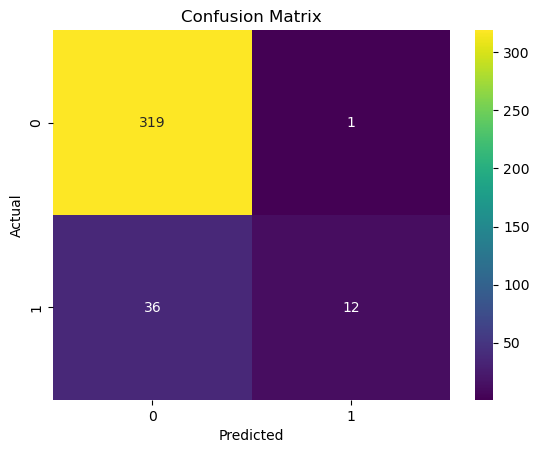

In [18]:
new_indices = np.argsort(importances[importances > 0])[::-1]
mostImp_feature_names = [X.columns[i] for i in new_indices]
X_new = X[mostImp_feature_names]

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=123)

model = RandomForestClassifier(n_estimators=50, random_state=123)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, predictions) 
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
<a id="T.5"></a>
### Compensation Analysis:
- #### In This Part, we will:
    * ##### Identify the columns related to compensation, such as `MonthlyIncome`, `HourlyRate`, `TotalWorkingYears`, `JobLevel`, `StockOptionLevel`, etc. Select these columns from the DataFrame for analysis.
    * ##### Explore the data, to understand the distribution and summary statistics of the selected compensation columns.
    * ##### Compare compensation across departments, to analyze how compensation varies across different groups such as departments, job roles, education levels, etc, and we will use `Bar` plot to apply this approach.
    * ##### Analyze relationships between compensation and other factors, to examine the relationships between compensation and other factors such as job satisfaction, performance ratings, or years of experience, and we will use `Scatter` plot to apply this approach.
    * ##### Perform statistical tests, to determine if there are significant differences in compensation between various groups, and we will use `t-tests` to apply our approach.

In [19]:
compensation_columns = ['MonthlyIncome', 'HourlyRate', 'TotalWorkingYears', 'JobLevel', 'StockOptionLevel']
employee_data[compensation_columns].describe()

,MonthlyIncome,HourlyRate,TotalWorkingYears,JobLevel,StockOptionLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.289307,0.512731,11.279592,2.063946,0.793878
std,0.247918,0.290420,7.780782,1.106940,0.852077
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.100158,0.257143,6.000000,1.000000,0.000000
50%,0.205898,0.514286,10.000000,2.000000,1.000000
75%,0.388099,0.767857,15.000000,3.000000,1.000000
max,1.000000,1.000000,40.000000,5.000000,3.000000


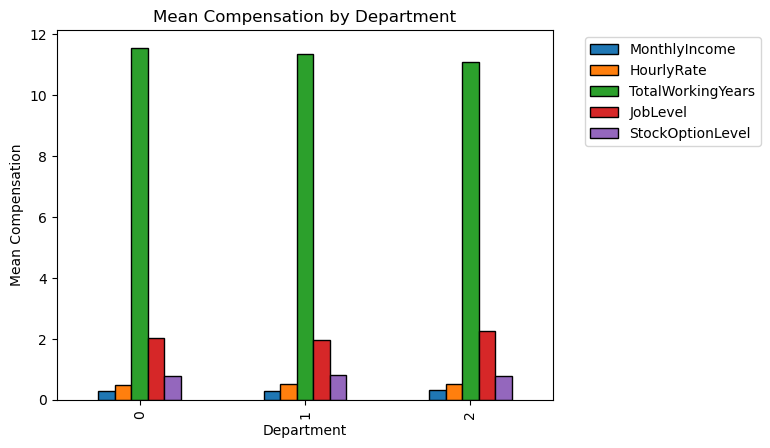

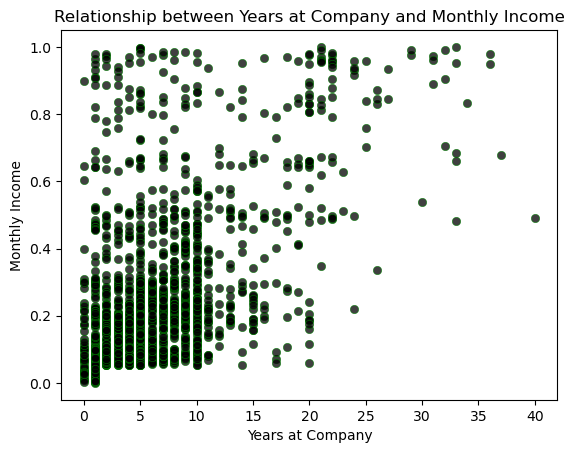

There is no significant difference in compensation between HR and R&D departments.


In [20]:
compensation_by_department = employee_data.groupby('Department')[compensation_columns].mean()
compensation_by_department.plot(kind='bar', edgecolor='black')
ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Department')
plt.ylabel('Mean Compensation')
plt.title('Mean Compensation by Department')
plt.show()

sns.scatterplot(data= employee_data, x= 'YearsAtCompany', y= 'MonthlyIncome', color= 'black', edgecolor= 'green', alpha= 0.75)
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.title('Relationship between Years at Company and Monthly Income')
plt.show()

hr_compensation = employee_data[employee_data['Department'] == 'Human Resources']['MonthlyIncome']
rd_compensation = employee_data[employee_data['Department'] == 'Research & Development']['MonthlyIncome']

t_stat, p_value = ttest_ind(hr_compensation, rd_compensation)
if p_value < 0.05:
    print("=" * 50)
    print("There is a significant difference in compensation between HR and R&D departments.")
    print("=" * 50)
else:
    print("=" * 50)
    print("There is no significant difference in compensation between HR and R&D departments.")
    print("=" * 50)

---
<a id="T.6"></a>
### Conclusions:
* #### As a conclusion from the implemented approaches up, we can go out from this project with those points:
    + ##### From the `Bar` plot above, it indicates that employees with more total working years tend to have higher compensation, on average. This suggests that experience and seniority within the company may play a significant role in determining an employee's compensation.
    + ##### From the `Scatter` plot above, it indicates a slight positive correlation between the number of years an employee has been with the company `YearsAtCompany` and their monthly income. Although the relationship is not very strong, it suggests that, on average, employees who have been with the company for a longer duration tend to have slightly higher monthly incomes.
    + ##### From the `t-tests` result above, since the p-value is not less than 0.05, it indicates that there is no significant difference in compensation between HR and R&D departments.
    + ##### Take into consideration the concluded points while implementing our approaches in this project.
    + ##### Further analysis can be applied to reveal more insights from this Treasure, like `Employee Satisfaction and Engagement Analysis`, `Employee Tenure and Career Growth`, etc.
    + ##### >.....<